In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('../../../Cleaned Datasets/rebate_cleaned.csv')

X = df.drop(columns=["Rebate Amount (USD)"])
y = df["Rebate Amount (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators = 30, max_features = 'sqrt', max_depth = 15, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9897503285151117
Precision: 0.9902619044116232
Recall: 0.9893986516044725
F1 Score: 0.9896300313377308


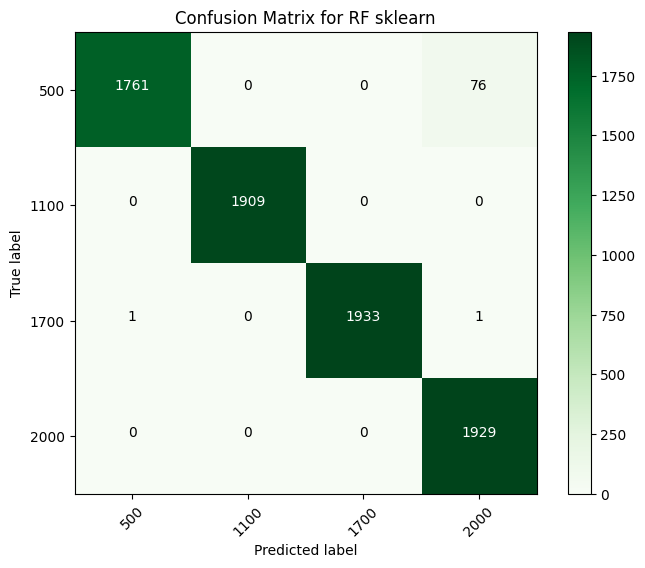

In [9]:

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix for RF sklearn')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test))) 
plt.xticks(tick_marks, ['500','1100','1700','2000'], rotation=45)
plt.yticks(tick_marks, ['500','1100','1700','2000'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()